<a href="https://colab.research.google.com/github/smathews88/machine_learning/blob/main/04_ml_random_forest_iris_flower_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Exploratory Data Analysis**

In [91]:
df['target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [92]:
df['sepal length (cm)'].unique(),df['sepal width (cm)'].unique(),df['petal width (cm)'].unique(),df['petal length (cm)'].unique()

(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
        4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
        6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9]),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
        4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6]),
 array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
        1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3]),
 array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
        4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
        5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
        5.7, 6.4, 5.4, 5.2]))

<Axes: xlabel='target', ylabel='petal length (cm)'>

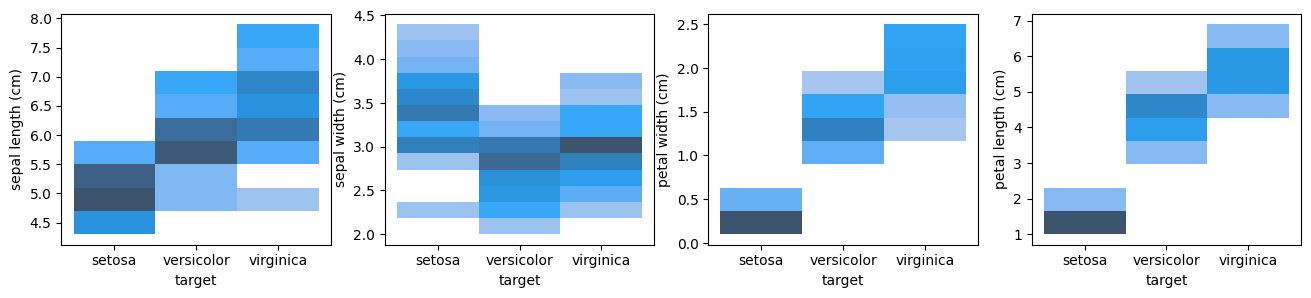

In [93]:
plt.figure(figsize=(16,3))
plt.subplot(1,4, 1)
sns.histplot(x='target', y='sepal length (cm)', data=df)
plt.subplot(1,4, 2)
sns.histplot(x='target', y='sepal width (cm)', data=df)
plt.subplot(1,4, 3)
sns.histplot(x='target', y='petal width (cm)', data=df)
plt.subplot(1,4, 4)
sns.histplot(x='target', y='petal length (cm)', data=df)

# **Normalize data**

In [95]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [96]:
scaler = MinMaxScaler()
df.drop('target', axis=1, inplace = True)
X = pd.DataFrame(scaler.fit_transform(df), columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'] )
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [100]:
y = pd.DataFrame(iris.target)

# **Split into test train set**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **Create and Train Model**

In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

<ipython-input-103-c93079bcb7e1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

# **Evaluate Model**

In [104]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.98